In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

In [55]:
bob_ross.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [56]:
bob_ross.shape, bob_ross.columns[:15]

((403, 27),
 Index(['painting_index', 'img_src', 'painting_title', 'season', 'episode',
        'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso',
        'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna',
        'Indian_Red'],
       dtype='object'))

In [57]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

# 1. Is there a stable base color palette?

# 1.1 Are there clear differences in usage frequency across colors?

This EDA analyzes the frequency with which individual colors appear across paintings to distinguish core palette colors from more variable stylistic choices. By examining binary color usage indicators, we gain an initial understanding of the structural foundations of Bob Ross’s visual style.

In [58]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Compute the proportion of paintings that use each color
color_freq = bob_ross[color_cols].mean().sort_values(ascending=False)
color_freq.head(10)

,0
Titanium_White,0.992556
Alizarin_Crimson,0.942928
Van_Dyke_Brown,0.920596
Cadmium_Yellow,0.858561
Yellow_Ochre,0.811414
Phthalo_Blue,0.801489
Bright_Red,0.796526
Midnight_Black,0.786600
Sap_Green,0.759305
Indian_Yellow,0.724566


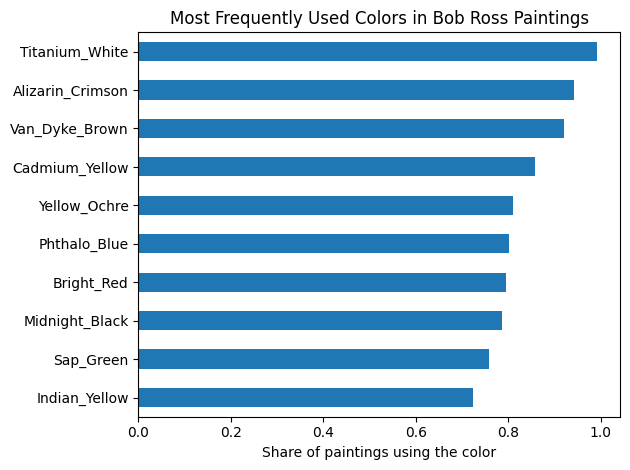

In [59]:
# Visualize the top 10 most frequently used colors
plt.figure()
color_freq.head(10).sort_values().plot(kind="barh")
plt.xlabel("Share of paintings using the color")
plt.title("Most Frequently Used Colors in Bob Ross Paintings")
plt.tight_layout()
plt.show()

Summary: The results indicate that Bob Ross relies heavily on a small group of core colors, while other colors are used more selectively. This pattern suggests a consistent underlying palette with limited variation around it.

# 1.2 Do a small number of core colors dominate palette construction, and how sharply do they differ from peripheral colors?

To better understand whether palette templates are built around a stable core, I examined the distribution of color usage frequencies. Rather than simply ranking colors, I focused on whether usage forms a core-periphery structure — where a few colors dominate while others appear only selectively.

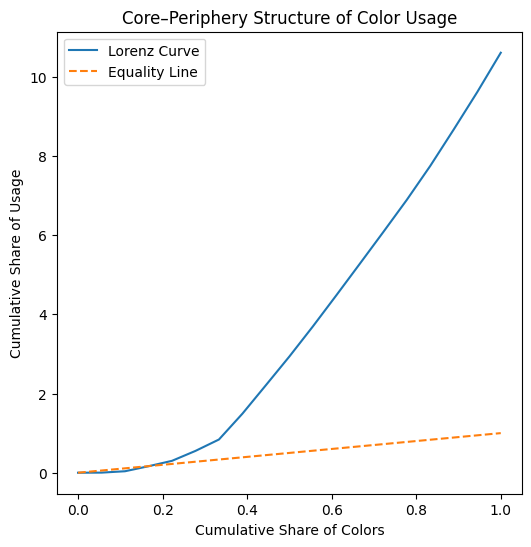

In [60]:
# color frequency
color_cols = bob_ross.columns[9:]
color_freq = bob_ross[color_cols].mean().sort_values()

# Lorenz curve
cum_colors = np.cumsum(color_freq.values)
cum_colors = np.insert(cum_colors, 0, 0)
x = np.linspace(0, 1, len(cum_colors))

plt.figure(figsize=(6,6))
plt.plot(x, cum_colors, label="Lorenz Curve")
plt.plot([0,1], [0,1], linestyle="--", label="Equality Line")
plt.title("Core–Periphery Structure of Color Usage")
plt.xlabel("Cumulative Share of Colors")
plt.ylabel("Cumulative Share of Usage")
plt.legend()
plt.show()

The Lorenz curve indicates that color usage is highly concentrated. A few core colors dominate most paintings, while the remaining colors are used more sparingly. This supports the idea that Bob Ross’s palettes are built around stable base colors rather than evenly distributed color choices.

# 2. Is the complexity of the color palette consistent?

# 2.1 How many colors are usually used in paintings?

This analysis focuses on understanding how much visual complexity Bob Ross typically employs in a single painting, measured by the number of unique colors used. By examining the distribution of palette complexity, the goal is to assess whether most paintings follow a consistent level of complexity or whether there are distinct groups ranging from minimal to highly complex palettes.

In [61]:
bob_ross["num_colors"].describe()

,num_colors
count,403.000000
mean,10.605459
std,2.378525
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,15.000000


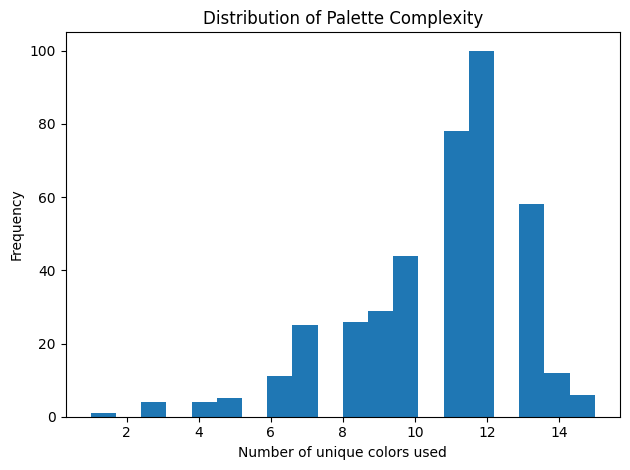

In [62]:
# Visualize how many unique colors are typically used in a painting
plt.figure()
bob_ross["num_colors"].plot(kind="hist", bins=20)
plt.xlabel("Number of unique colors used")
plt.title("Distribution of Palette Complexity")
plt.tight_layout()
plt.show()

Summary: Most paintings use around 10–12 unique colors, with very few works using extremely small or very large palettes. This narrow concentration suggests that Bob Ross generally maintains a consistent level of palette complexity, with only occasional deviations.

# 2.2 Are there distinct palette complexity regimes rather than one continuous distribution?

Instead of only observing the distribution of palette size, I examined whether paintings fall into distinct complexity regimes — such as minimalist, standard, or complex palettes — which may correspond to different template types.

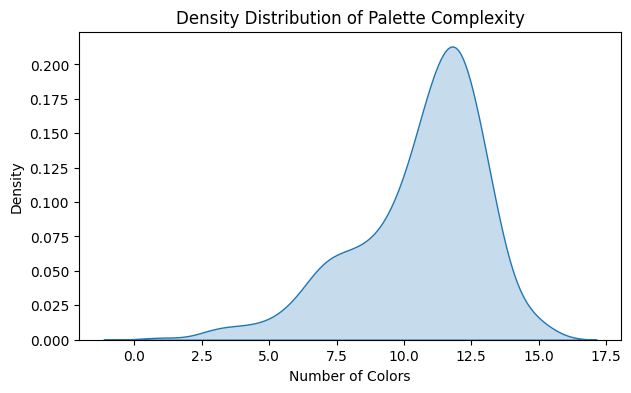

In [63]:
plt.figure(figsize=(7,4))
sns.kdeplot(bob_ross["num_colors"], fill=True)
plt.title("Density Distribution of Palette Complexity")
plt.xlabel("Number of Colors")
plt.ylabel("Density")
plt.show()

The density curve indicates that most paintings use a similar number of colors, with complexity concentrated around a central range. This suggests that palette size follows a stable working range rather than forming clearly distinct complexity regimes.

# 3. How is the template extended?

# 3.1 How does palette expansion affect reliance on rare colors?

To test whether palette expansion introduces novelty or recombination, I analyzed the relationship between total palette size and the proportion of rare colors.

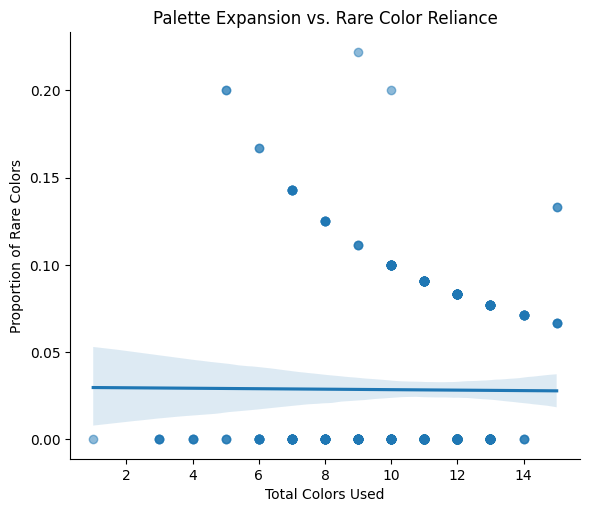

In [64]:
if 'rare_color_ratio' not in bob_ross.columns:
    rare_threshold = 0.2
    rare_colors = color_freq[color_freq < rare_threshold].index.tolist()

    # Calculate rare_color_ratio for each painting
    def calculate_rare_color_ratio(row):
        used_colors_in_painting = [col for col in color_cols if row[col]]
        rare_colors_used = [color for color in used_colors_in_painting if color in rare_colors]
        if row['num_colors'] == 0:
            return 0.0
        return len(rare_colors_used) / row['num_colors']

    bob_ross['rare_color_ratio'] = bob_ross.apply(calculate_rare_color_ratio, axis=1)

sns.lmplot(
    data=bob_ross,
    x="num_colors",
    y="rare_color_ratio",
    height=5,
    aspect=1.2,
    scatter_kws={"alpha":0.5}
)

plt.title("Palette Expansion vs. Rare Color Reliance")
plt.xlabel("Total Colors Used")
plt.ylabel("Proportion of Rare Colors")
plt.show()

The plot indicates that using more colors does not necessarily mean relying more on rare ones. Paintings with larger palettes still depend primarily on commonly used colors. This suggests that palette expansion is more likely driven by recombining familiar colors rather than introducing many new ones.

# 4. Does the color combination stably appear?

# 4.1 Co-occurrence Patterns Among Frequently Used Colors

This analysis examines how colors tend to appear together in Bob Ross paintings, rather than in isolation. By studying color co-occurrence patterns, the goal is to understand whether Bob Ross relied on stable, recurring color combinations that define his visual style, or whether palettes varied freely across paintings. Identifying consistent color pairings helps reveal implicit design rules behind the artwork—such as base colors that anchor compositions and accent colors that are selectively combined. This provides insight into the structure of artistic decision-making and helps distinguish intentional stylistic patterns from random color usage.

In [65]:
# Compute a color co-occurrence matrix showing how often pairs of colors appear together in the same painting
top10_cols = color_freq.head(10).index
color_matrix = bob_ross[top10_cols].astype(int)
cooccur = color_matrix.T.dot(color_matrix)

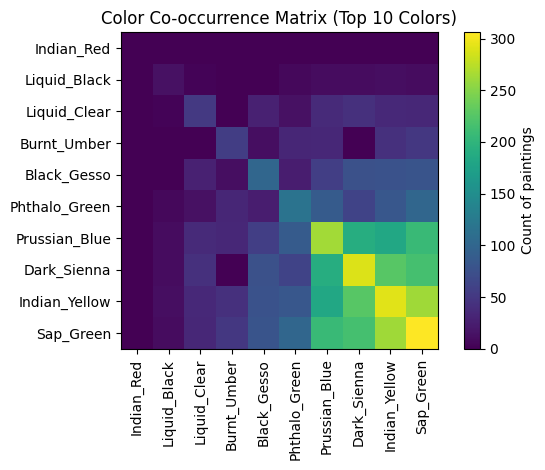

In [66]:
# Visualize the color co-occurrence matrix to identify frequently paired colors across paintings
plt.figure()
plt.imshow(cooccur.values)
plt.xticks(range(len(top10_cols)), top10_cols, rotation=90)
plt.yticks(range(len(top10_cols)), top10_cols)
plt.title("Color Co-occurrence Matrix (Top 10 Colors)")
plt.colorbar(label="Count of paintings")
plt.tight_layout()
plt.show()

Summary: The co-occurrence matrix reveals clear relationships among core colors, with certain colors—such as Titanium White, Alizarin Crimson, and Van Dyke Brown—frequently appearing together. This indicates that color usage is structured, with stable combinations rather than independent or random selection.

# 4.2 Do recurring color pairings form structured palette networks?

To move beyond pairwise counts, I visualized color relationships as a co-occurrence network, where nodes represent colors and edges represent pairing strength.

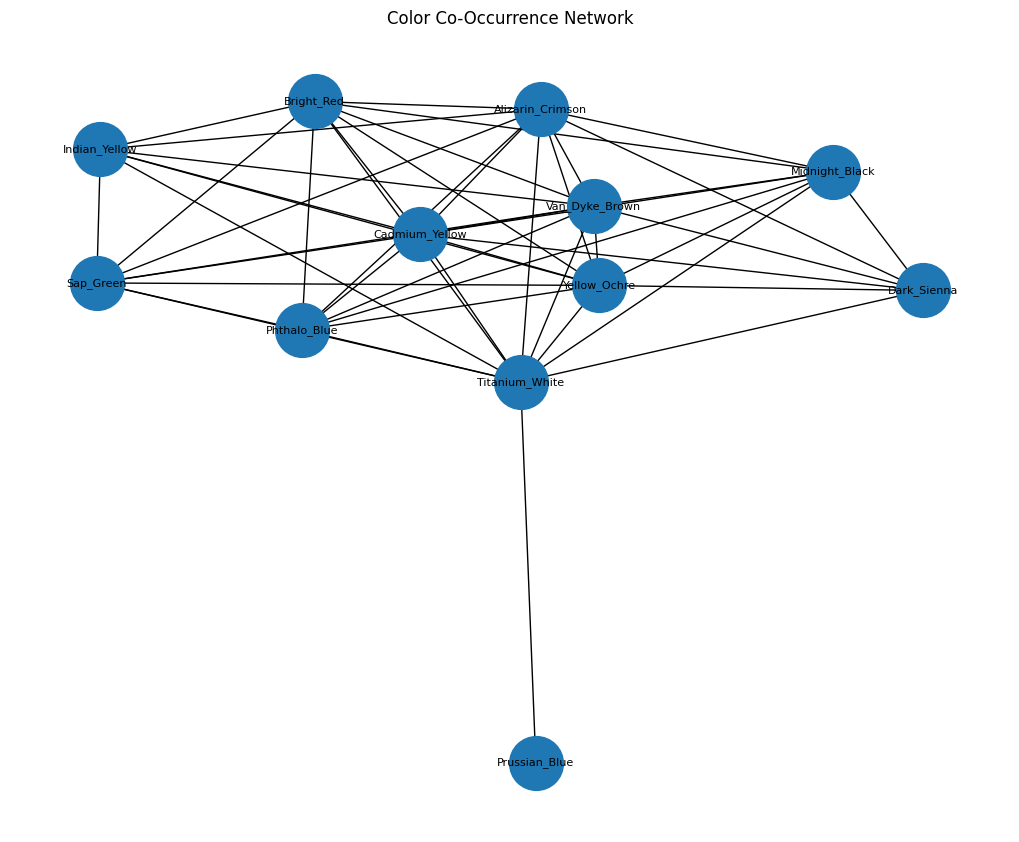

In [67]:
import networkx as nx

# co-occurrence matrix
color_matrix = bob_ross[color_cols].astype(int)
cooccur = color_matrix.T.dot(color_matrix)

# build network
G = nx.Graph()

for i in cooccur.index:
    for j in cooccur.columns:
        if i != j and cooccur.loc[i,j] > 250:  # threshold
            G.add_edge(i, j, weight=cooccur.loc[i,j])

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_size=1500,
    font_size=8
)

plt.title("Color Co-Occurrence Network")
plt.show()

The co-occurrence network reveals a highly interconnected core palette, where several foundational colors consistently appear together. Surrounding this core are supporting colors that extend palette variation while maintaining structural cohesion. Peripheral colors show limited integration, suggesting occasional rather than systematic use.

# Hierarchical

# Use the Jaccard distance

In [68]:
from scipy.spatial.distance import pdist, squareform

# painting × color
M = color_matrix

# Jaccard distance
dist = pdist(M, metric="jaccard")
dist_matrix = squareform(dist)

# hierarchical clustering

In [69]:
from scipy.cluster.hierarchy import linkage

Z = linkage(dist, method="average")

# dendrogram

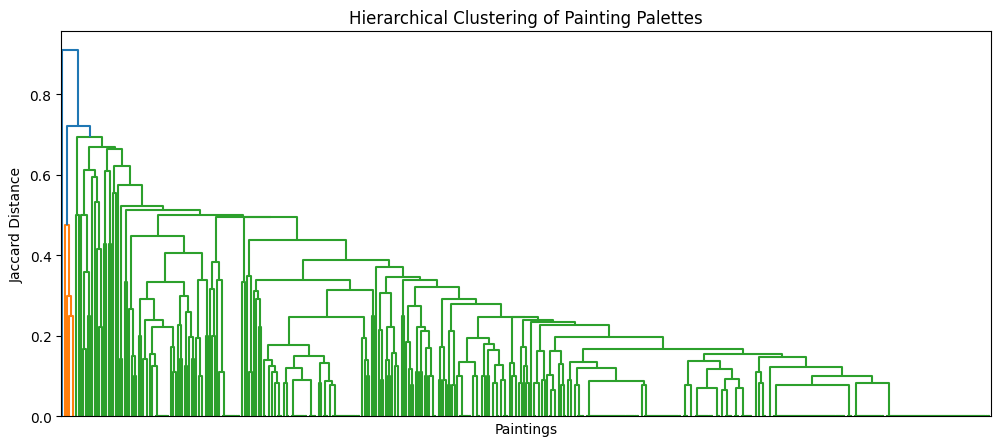

In [70]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
dendrogram(Z, no_labels=True, color_threshold=0.7)
plt.title("Hierarchical Clustering of Painting Palettes")
plt.xlabel("Paintings")
plt.ylabel("Jaccard Distance")
plt.show()

Hierarchical clustering based on Jaccard distance reveals that most paintings merge at relatively low dissimilarity levels, indicating high similarity in palette composition. This suggests that a large proportion of works rely on closely related color structures. However, a small number of branches only merge at higher distance thresholds, implying occasional deviations from dominant palette patterns. Overall, the dendrogram exhibits a single primary backbone with limited branching, supporting the interpretation that Bob Ross’s palette system is organized around a dominant template with minor variations rather than multiple fully distinct regimes.

In [71]:
from scipy.cluster.hierarchy import fcluster

k = 4
clusters = fcluster(Z, k, criterion="maxclust")

bob_ross["cluster"] = clusters
bob_ross["cluster"].value_counts()

,count
cluster,
3,395
1,5
2,2
4,1


Cluster membership distribution further reinforces the dominance of a single palette regime. The largest cluster contains 394 out of 403 paintings, indicating that the overwhelming majority of works share highly similar color compositions. The remaining clusters contain only a handful of paintings, suggesting rare stylistic deviations rather than structurally distinct palette systems. This extreme concentration supports the existence of a dominant palette template rather than multiple equally prevalent color regimes.

In [72]:
cluster_profiles = bob_ross.groupby("cluster")[color_cols].mean()

cluster_profiles.T.sort_values(by=1, ascending=False).head(10)

cluster,1,2,3,4
Van_Dyke_Brown,1.0,0.0,0.924051,1.0
Titanium_White,1.0,1.0,0.994937,0.0
Prussian_Blue,1.0,1.0,0.648101,0.0
Alizarin_Crimson,0.4,0.0,0.956962,0.0
Liquid_Black,0.2,0.0,0.032911,0.0
Black_Gesso,0.2,0.5,0.250633,0.0
Indian_Yellow,0.2,0.5,0.734177,0.0
Bright_Red,0.0,1.0,0.807595,0.0
Burnt_Umber,0.0,1.0,0.134177,0.0
Cadmium_Yellow,0.0,0.5,0.873418,0.0


Cluster-level palette profiles reveal distinct compositional characteristics across groups. The dominant cluster exhibits high usage of foundational landscape colors such as Titanium White, Alizarin Crimson, Sap Green, and Cadmium Yellow, consistent with the artist’s signature palette structure. Smaller clusters display more specialized configurations. For instance, one cluster shows elevated reliance on darker and cooler tones such as Midnight Black and Prussian Blue, suggesting alternative atmospheric or nocturnal palette regimes. A single-painting cluster lacking Titanium White further highlights rare compositional deviations. These profiles indicate that while a dominant palette template exists, secondary template variations occasionally emerge.

# Frequent Itemsets + Association Rules

In [73]:
color_cols = [
    c for c in bob_ross.columns
    if bob_ross[c].dtype == bool
]

X = bob_ross[color_cols].astype(bool)

X.shape

(403, 18)

In [74]:
!pip -q install mlxtend

In [75]:
from mlxtend.frequent_patterns import apriori

In [76]:
freq = apriori(
    X,
    min_support=0.30,   # At least 30% of the works appear
    use_colnames=True
)

freq["size"] = freq["itemsets"].apply(len)

freq_2to5 = freq[
    (freq["size"] >= 2) &
    (freq["size"] <= 5)
].sort_values("support", ascending=False)

freq_2to5.head(15)

,support,itemsets,size
74,0.937965,"(Alizarin_Crimson, Titanium_White)",2
72,0.915633,"(Van_Dyke_Brown, Titanium_White)",2
76,0.878412,"(Van_Dyke_Brown, Alizarin_Crimson)",2
295,0.875931,"(Van_Dyke_Brown, Alizarin_Crimson, Titanium_Wh...",3
29,0.856079,"(Cadmium_Yellow, Titanium_White)",2
32,0.831266,"(Alizarin_Crimson, Cadmium_Yellow)",2
174,0.828784,"(Alizarin_Crimson, Cadmium_Yellow, Titanium_Wh...",3
30,0.811414,"(Van_Dyke_Brown, Cadmium_Yellow)",2
73,0.808933,"(Yellow_Ochre, Titanium_White)",2
172,0.808933,"(Van_Dyke_Brown, Cadmium_Yellow, Titanium_White)",3


In [77]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    freq,
    metric="lift",
    min_threshold=1.10
)

rules["A_size"] = rules["antecedents"].apply(len)
rules["B_size"] = rules["consequents"].apply(len)

rules_focus = rules[
    (rules["A_size"] <= 3) &
    (rules["B_size"] <= 2)
].sort_values(["lift","confidence"], ascending=False)

rules_focus.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,A_size,B_size
14574,"(Indian_Yellow, Prussian_Blue, Midnight_Black)","(Sap_Green, Dark_Sienna)",0.374690,0.535980,0.349876,0.933775,1.742182,1.0,0.149050,7.006700,0.681273,0.623894,0.857279,0.793276,3,2
14713,"(Van_Dyke_Brown, Indian_Yellow, Midnight_Black)","(Sap_Green, Dark_Sienna)",0.560794,0.535980,0.498759,0.889381,1.659353,1.0,0.198185,4.194739,0.904714,0.834025,0.761606,0.909968,3,2
14710,"(Van_Dyke_Brown, Sap_Green, Midnight_Black)","(Indian_Yellow, Dark_Sienna)",0.545906,0.563275,0.498759,0.913636,1.622006,1.0,0.191264,5.056811,0.844493,0.817073,0.802247,0.899549,3,2
14743,"(Yellow_Ochre, Indian_Yellow, Midnight_Black)","(Sap_Green, Dark_Sienna)",0.575682,0.535980,0.496278,0.862069,1.608397,1.0,0.187724,3.364144,0.891462,0.806452,0.702748,0.893997,3,2
6447,"(Bright_Red, Sap_Green, Dark_Sienna)","(Indian_Yellow, Midnight_Black)",0.491315,0.590571,0.466501,0.949495,1.607758,1.0,0.176345,8.106700,0.743124,0.758065,0.876645,0.869705,3,2
14577,"(Indian_Yellow, Prussian_Blue, Dark_Sienna)","(Sap_Green, Midnight_Black)",0.367246,0.593052,0.349876,0.952703,1.606440,1.0,0.132080,8.604041,0.596607,0.573171,0.883776,0.771330,3,2
15994,"(Yellow_Ochre, Prussian_Blue, Midnight_Black)","(Sap_Green, Dark_Sienna)",0.424318,0.535980,0.364764,0.859649,1.603882,1.0,0.137338,3.306141,0.654029,0.612500,0.697533,0.770102,3,2
14573,"(Prussian_Blue, Sap_Green, Dark_Sienna)","(Indian_Yellow, Midnight_Black)",0.369727,0.590571,0.349876,0.946309,1.602363,1.0,0.131526,7.625620,0.596443,0.573171,0.868863,0.769373,3,2
10537,"(Cadmium_Yellow, Sap_Green, Dark_Sienna)","(Indian_Yellow, Midnight_Black)",0.526055,0.590571,0.496278,0.943396,1.597431,1.0,0.185605,7.233251,0.789110,0.800000,0.861750,0.891866,3,2
10539,"(Cadmium_Yellow, Indian_Yellow, Midnight_Black)","(Sap_Green, Dark_Sienna)",0.580645,0.535980,0.496278,0.854701,1.594650,1.0,0.185064,3.193548,0.889231,0.800000,0.686869,0.890313,3,2


Association rule analysis further reveals directional dependencies among palette components. Several high-confidence rules indicate that darker tonal bundles frequently co-occur with supporting landscape colors such as Sap Green and Dark Sienna. Elevated lift values confirm that these relationships exceed random co-occurrence, suggesting functional palette structures rather than independent color usage. These findings reinforce the existence of recurring compositional templates governed by systematic color dependencies.

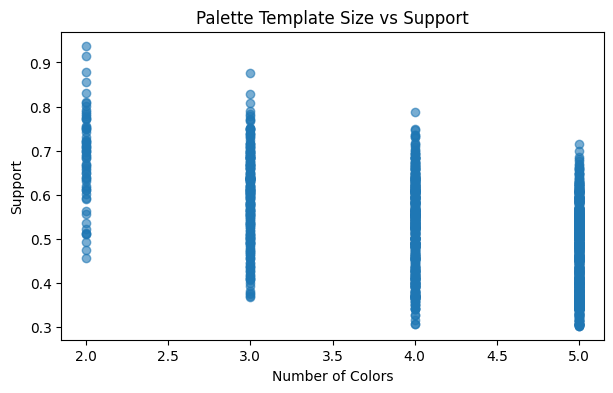

In [78]:
plt.figure(figsize=(7,4))
plt.scatter(
    freq_2to5["size"],
    freq_2to5["support"],
    alpha=0.6
)

plt.title("Palette Template Size vs Support")
plt.xlabel("Number of Colors")
plt.ylabel("Support")
plt.show()

The relationship between template size and support shows a clear pattern in how color combinations are reused. Combinations that include only two or three colors appear most frequently across paintings, suggesting that these basic sets form the foundation of many palettes. As more colors are added to a combination, the frequency of that exact combination appearing begins to decrease. This indicates that larger palettes are usually created by adding extra colors onto a stable core set rather than forming entirely new combinations. In other words, palette complexity grows by building on familiar color groups instead of introducing completely different ones.